# Cleaning the data

In [1]:
import requests
from pandas.io.json import json_normalize
import pandas as pd

In [2]:
#Importing the data

df=pd.read_csv('owid-covid-data.csv')

In [3]:
#Displaying the data frame

with pd.option_context("display.max_columns", None):
    display(df)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.125,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221024,ZWE,Africa,Zimbabwe,2022-09-29,257409.0,0.0,21.429,5602.0,0.0,0.571,16094.577,0.000,1.340,350.267,0.000,0.036,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.61,15993524.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
221025,ZWE,Africa,Zimbabwe,2022-09-30,257465.0,56.0,25.143,5602.0,0.0,0.429,16098.078,3.501,1.572,350.267,0.000,0.027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.61,15993524.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN

In [4]:
#Number of rows and columns
df.shape

(221029, 67)

In [4]:
#Searching for null values

null_dict={}
for i in df:
    if df[i].isnull().sum() !=0: 
        null_dict[i] = df[i].isnull().sum()

null_df=pd.DataFrame(data=null_dict, index=[0], )
null_df
null_df=null_df.T
null_df
null_df=null_df.sort_values(by=[0],ascending=False)
with pd.option_context("display.max_rows", None):
    display(null_df)

,0
weekly_icu_admissions_per_million,213888
weekly_icu_admissions,213888
excess_mortality_cumulative_per_million,213569
excess_mortality_cumulative,213569
excess_mortality_cumulative_absolute,213569
excess_mortality,213522
weekly_hosp_admissions_per_million,206815
weekly_hosp_admissions,206815
icu_patients_per_million,192932
icu_patients,192932


In [5]:
df.drop(['weekly_icu_admissions_per_million', 'weekly_icu_admissions',
        'excess_mortality_cumulative_per_million', 'excess_mortality_cumulative', 'excess_mortality_cumulative_absolute',
         'excess_mortality', 'weekly_hosp_admissions_per_million', 'weekly_hosp_admissions'], axis=1, inplace=True)

In [6]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',

In [7]:
df.shape

(221029, 59)

In [8]:
df.duplicated().value_counts()
#The data set does not contain any duplicated values

False    221029
dtype: int64

In [9]:
with pd.option_context("display.max_columns", None):
    display(df)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.125,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221024,ZWE,Africa,Zimbabwe,2022-09-29,257409.0,0.0,21.429,5602.0,0.0,0.571,16094.577,0.000,1.340,350.267,0.000,0.036,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.61,15993524.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
221025,ZWE,Africa,Zimbabwe,2022-09-30,257465.0,56.0,25.143,5602.0,0.0,0.429,16098.078,3.501,1.572,350.267,0.000,0.027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.61,15993524.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
221026,ZWE,Africa,Zimbabwe,2022-10-01,257465.0,0.0,21.000,5602.0,0.0,0.429,16098.078,0.000,1.313,350.267,0.000,0.027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.61,15993524.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
221027,ZWE,Africa,Zimbabwe,2022-10-02,257517.0,52.0,25.286,5602.0,0.0,0.429,16101.330,3.251,1.581,350.267,0.000,0.027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [10]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,year,month
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,2020,2
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,2020,2
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,2020,2
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,2020,2
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,2020,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221024,ZWE,Africa,Zimbabwe,2022-09-29,257409.0,0.0,21.429,5602.0,0.0,0.571,...,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,2022,9
221025,ZWE,Africa,Zimbabwe,2022-09-30,257465.0,56.0,25.143,5602.0,0.0,0.429,...,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,2022,9
221026,ZWE,Africa,Zimbabwe,2022-10-01,257465.0,0.0,21.000,5602.0,0.0,0.429,...,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,2022,10
221027,ZWE,Africa,Zimbabwe,2022-10-02,257517.0,52.0,25.286,5602.0,0.0,0.429,...,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,2022,10


# Data vizualization

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Grouping total cases by the continent
df2=df.groupby(['continent'])['total_cases'].sum().reset_index()
df2

,continent,total_cases
0,Africa,5.743919e+09
1,Asia,6.182029e+10
2,Europe,7.162076e+10
3,North America,4.499336e+10
4,Oceania,2.172886e+09
5,South America,2.805013e+10


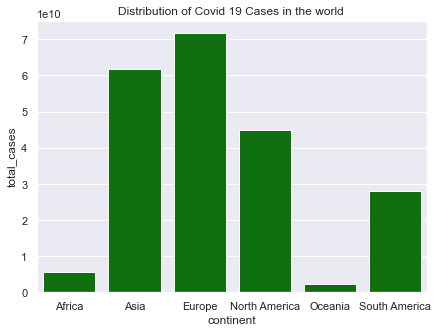

In [13]:
#Figure 1
#Plotting a bar plot in order to see how the cases of Covid evolved on each continent
#This vizualization helps us understand how affected each continent was from the pandemic

sns.set(rc = {'figure.figsize':(7,5)})
sns.barplot(data=df2, x='continent', y='total_cases', color='green').set(title='Distribution of Covid 19 Cases in the world ')
plt.show()

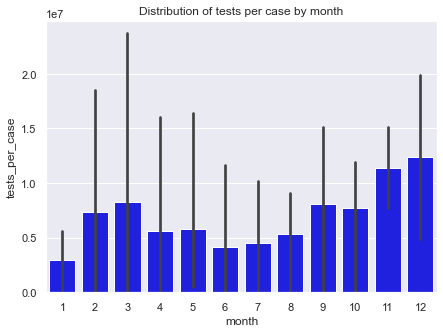

In [14]:
#Figure 2

#This barplot will show how many tests were performed for each month of the year (for 2020, 2021, 2022)
#It gives us insight about the period people are getting sick. It will help hospitals to prepare for the months which are more predisposed
#to be full of Covid patients

df1=df.groupby(['year', 'month'])['tests_per_case'].sum().reset_index()
df1
sns.set(rc = {'figure.figsize':(7,5)})
d= sns.barplot(data=df1, x='month', y='tests_per_case', color='blue').set(title='Distribution of tests per case by month')
plt.show()

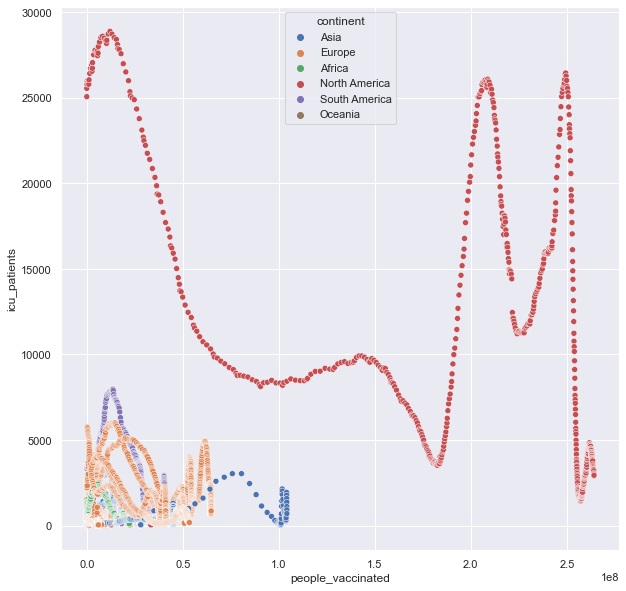

In [15]:
#Figure 3

#I ploted the scatterplot in order to see how the vaccination of people affected the pacients in intensive care unit (icu)

sns.set(rc = {'figure.figsize':(10,10)})
sns.scatterplot(data=df, x='people_vaccinated', y='icu_patients',hue='continent')
plt.show()

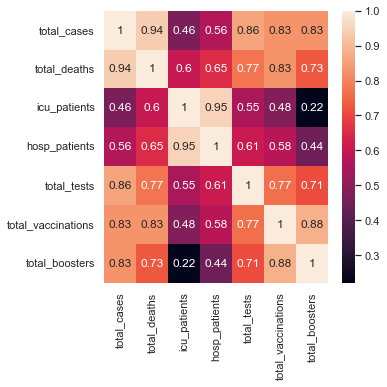

In [16]:
#Figure 4

#This vizualization shows the corelation between the total cases, total deaths...total boosters.
#It will show us how is vaccination correlated to the cases of Covid-19. 
#Also, it is important because it gives us insight of the corelation between total deaths caused by Covid and the patiens who were in hospital.

sns.set(rc = {'figure.figsize':(5,5)})
sns.heatmap(df[['total_cases', 'total_deaths','icu_patients', 'hosp_patients', 'total_tests', 'total_vaccinations',
              'total_boosters']].corr(), annot=True)
plt.show()

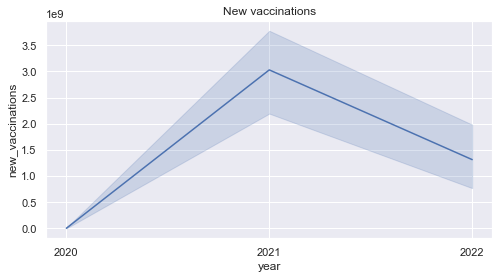

In [17]:
#Figure 5

#This lineplot gives us insight about the trend of the vaccinations
#For example, in 2021 there was a spike in vaccinations, 
#but in 2020 when the vaccines were not on all markets, the values of new vaccinations are oriented towards 0

sns.set(rc = {'figure.figsize':(8,4)})
df3=df.groupby(['year', 'month'])['new_vaccinations'].sum().reset_index()
df3
p=sns.lineplot(data=df3, x='year', y='new_vaccinations')
p.set(title='New vaccinations')
p.set_xticks([2020, 2021, 2022])
plt.show()

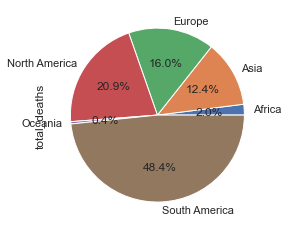

In [19]:
#Figure 6

#This plot pie shows how the deaths were distribuited between continents
#This vizualization is important because it shows us an overview of the continets which are more predisposed to death caused by Covid-19

df4=df.groupby(['continent'])['total_deaths'].mean()

df4.plot.pie(autopct="%.1f%%");